# 2) IACOV - Model Development for Prognosis - DEATH
## Strategy 8) Training on 70% of a specific hospital plus same absolute number of other regions hospitals

In [96]:
# !pip install npm nodejs

In [97]:
# !jupyter lab clean
# !jupyter lab build

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# para evitarmos a exibição dos dados em notacao científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#comment next line to not use MLFlow for cleaning data
from MLFlow_Classification import *
from MLFlow_Utils import *

In [3]:
#Put csv in same folder as this notebook
dataset = pd.read_csv("df_iacov_en.csv", delimiter=";")
df_iacov_model = pd.DataFrame(dataset)
df_iacov_model.shape

(8494, 65)

In [4]:
df_iacov_model.columns

Index(['city_hospital', 'cd_patient', 'hospital_time', 'age', 'race', 'braden',
       'heart_rate', 'resp_rate', 'sys_press', 'dias_press', 'mean_press',
       'temp', 'saturation', 'weight', 'height', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'neutr_lymph_ratio', 'lymph_crp_ratio',
       'basophils', 'eosinophils', 'monocytes', 'crp', 'albumin', 'ldh', 'alt',
       'ast', 'total_bilirubin', 'direct_bilirubin', 'indirect_bilirubin',
       'urea', 'sodium', 'potassium', 'creatinine', 'troponin', 'd_dimer',
       'venous_lactate', 'cpk', 'inr', 'aptt', 'arterial_lactate', 'gas_ph',
       'gaso_po2', 'gas_paco2', 'gas_hco3', 'gas_be', 'gas_so2', 'magnesium',
       'calcium_ionised', 'total_calcium', 'glucose', 'state', 'region', 'icu',
       'death', 'mv', 'male'],
      dtype='object')

In [6]:
df_iacov_model.iloc[:,2:65].head(5)

,hospital_time,age,race,braden,heart_rate,resp_rate,sys_press,dias_press,mean_press,temp,...,magnesium,calcium_ionised,total_calcium,glucose,state,region,icu,death,mv,male
0,10.000,56.000,Pardo,nan,89.000,23.000,130.000,80.000,96.650,36.500,...,nan,nan,nan,nan,AM,NORTE,1,0,1,1.000
1,10.000,61.000,Pardo,nan,86.000,18.000,172.000,75.000,107.301,34.800,...,2.100,1.150,nan,nan,AM,NORTE,1,1,1,1.000
2,79.000,28.000,Pardo,nan,80.000,30.000,117.000,56.000,76.313,37.400,...,2.500,1.210,7.280,nan,AM,NORTE,1,0,1,1.000
3,15.000,69.000,Pardo,nan,68.000,nan,149.000,81.000,103.644,37.300,...,nan,nan,nan,nan,AM,NORTE,0,0,0,0.000
4,16.000,66.000,Pardo,nan,67.000,nan,124.000,75.000,91.317,36.600,...,2.100,nan,7.770,nan,AM,NORTE,1,0,1,1.000


## 2.1) Assign binary outcome to be predicted

### 2.1.1) Maintain essential variables (LEAN Model)

In [9]:
#22 predictors + outcome
df_iacov_model_lean = df_iacov_model[['city_hospital'
                                      ,'age'
                                      ,'male'
                                      ,'heart_rate'
                                      ,'resp_rate'
                                      ,'sys_press'
                                      ,'dias_press'
                                      ,'mean_press'
                                      ,'temp'
                                      ,'hemoglobin'
                                      ,'platelets'
                                      ,'hematocrit'
                                      ,'red_cells_count'
                                      ,'hcm'
                                      ,'rdw'
                                      ,'mcv'
                                      ,'leukocytes'
                                      ,'neutrophil'
                                      ,'lymphocytes'
                                      ,'basophils'
                                      ,'eosinophils'
                                      ,'monocytes'
                                      ,'crp'
                                      ,'death'
                                      ,'region' #for filtering purposes
                                      ,'state' #for filtering purposes
                                     ]]
df_iacov_model_lean.shape

(8494, 26)

In [11]:
# df_iacov_model_lean.city_hospital.value_counts()

In [12]:
df_iacov_model_lean.to_csv('df_iacov_model_lean.csv', sep=';', index=False)

### 2.1.2) Filter a specific hospital

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

# para evitarmos a exibição dos dados em notacao científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#comment next line to not use MLFlow for cleaning data
from MLFlow_Classification import *
from MLFlow_Utils import *

In [14]:
#Put csv in same folder as this notebook
df_all_hospitals = pd.read_csv("df_iacov_model_lean.csv", delimiter=";", decimal=".")
df_all_hospitals.shape

(8494, 26)

In [15]:
df_all_hospitals.columns

Index(['city_hospital', 'age', 'male', 'heart_rate', 'resp_rate', 'sys_press',
       'dias_press', 'mean_press', 'temp', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'basophils', 'eosinophils', 'monocytes',
       'crp', 'death', 'region', 'state'],
      dtype='object')

In [16]:
df_all_hospitals.region.value_counts()

SUDESTE        4201
NORDESTE       2389
CENTROOESTE     898
SUL             712
NORTE           294
Name: region, dtype: int64

In [17]:
column_summaries(df_all_hospitals)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
city_hospital,0,0.000,19,0,object,nan,nan,nan,nan,nan,nan,nan,nan,nan
age,0,0.000,98,0,float64,-0.114,8494.000,58.385,17.287,18.000,45.000,59.000,71.000,105.000
male,1,0.012,2,3814,float64,-0.205,8493.000,0.551,0.497,0.000,0.000,1.000,1.000,1.000
heart_rate,2654,31.246,184,0,float64,0.609,5840.000,86.017,17.388,13.000,75.000,85.000,96.000,233.000
resp_rate,3368,39.652,74,1,float64,6.066,5126.000,21.989,7.064,0.000,18.000,20.000,24.000,202.000
sys_press,3211,37.803,220,0,float64,70.917,5283.000,126.629,179.854,10.000,110.000,122.000,138.000,13090.000
dias_press,3202,37.697,155,0,float64,17.255,5292.000,74.777,18.972,6.000,67.000,76.000,81.000,931.000
mean_press,3644,42.901,1456,326,float64,-1.719,4850.000,83.867,28.192,0.000,78.977,90.000,98.500,235.000
temp,3115,36.673,129,1,float64,65.829,5379.000,36.438,4.744,0.000,36.000,36.300,36.800,372.000
hemoglobin,1984,23.358,250,0,float64,17.184,6510.000,12.766,3.096,1.400,11.500,13.000,14.300,133.000


In [18]:
import ipywidgets as widgets
from IPython.display import clear_output

In [20]:
# df_all_hospitals.city_hospital.value_counts()

Code omitted due to confidentiality

In [22]:
specific_hospital = 'Choose a hospital'
df_iacov_model_lean = df_all_hospitals

def dropdown_hospital_eventhandler(change):
    global specific_hospital 
    specific_hospital = change.new
    dropdown_hospital.observe(dropdown_hospital_eventhandler, names='value')

In [23]:
dropdown_hospital.observe(dropdown_hospital_eventhandler, names='value')

**Select Hospital to train**

In [24]:
# !pip install ipywidgets

In [25]:
# !jupyter nbextension enable --py widgetsnbextension

In [26]:
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [28]:
# display(dropdown_hospital)

**Filter all hospitals except the selected above**

In [29]:
df_all_hospitals.region.value_counts()

SUDESTE        4201
NORDESTE       2389
CENTROOESTE     898
SUL             712
NORTE           294
Name: region, dtype: int64

**Split train/test of specific Hospital**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
#Filter the specific hospital
df_iacov_model_lean_specific = df_all_hospitals[df_all_hospitals.city_hospital == specific_hospital]
df_iacov_model_lean_specific.shape

(1776, 26)

In [32]:
X_specific = df_iacov_model_lean_specific.drop(['death'],axis=1)
X_specific.shape

(1776, 25)

In [33]:
y_specific = df_iacov_model_lean_specific['death']
y_specific.shape

(1776,)

In [34]:
X_train_specific, X_test_specific, y_train_specific, y_test_specific = train_test_split(X_specific, y_specific, test_size=0.30, random_state=42, stratify=y_specific)

In [35]:
X_train_specific.shape

(1243, 25)

In [36]:
X_test_specific.shape

(533, 25)

**Filter same absolute number from hospitals on same region**

PS: Also removed <code>omitted</code> hospital due to very low positive cases

In [37]:
from random import sample

#Sample all hospitals except specific hospital
df_all_hospitals_except_specific = df_all_hospitals[(~df_all_hospitals.index.isin(X_specific.index)) &
                                                       (df_all_hospitals.city_hospital != 'omitted')]

#Sample all hospitals of regions distinct of specific hospital
df_all_hospitals_same_region = df_all_hospitals_except_specific[df_all_hospitals_except_specific.region != X_specific.region.iloc[0]]

#Then, sample all hospital data with same absolute number on same region as specific hospital
df_iacov_model_lean = df_all_hospitals_same_region.sample(X_train_specific.shape[0], random_state=42)
df_iacov_model_lean.shape

(1243, 26)

In [44]:
#Check data from same region
# df_iacov_model_lean.city_hospital.value_counts()

**Append 70% data of specific hospital**

In [40]:
df_iacov_model_lean = df_iacov_model_lean.append(X_train_specific)
df_iacov_model_lean.shape

(2486, 26)

In [42]:
#Check after apending data of specific hospital
# df_iacov_model_lean.city_hospital.value_counts()

In [46]:
# print("Specific: " + specific_hospital )
print("(training - all hospitals) dataset: " + str(df_iacov_model_lean.shape))

print("\n(training - specific) dataset: {}".format(X_train_specific.shape))

print("\n(test - specific) dataset: {}".format(X_test_specific.shape))

(training - all hospitals) dataset: (2486, 26)

(training - specific) dataset: (1243, 25)

(test - specific) dataset: (533, 25)


### 2.1.3) Dropping unused variables (All hospitals)

In [47]:
df_iacov_model_lean = df_iacov_model_lean.drop(['city_hospital'],axis=1)
df_iacov_model_lean.shape

(2486, 25)

In [48]:
#Preencho NAs com 0 
df_iacov_model_lean['death'] = df_iacov_model_lean['death'].fillna(0)
df_iacov_model_lean.death.value_counts()

0.000    2245
1.000     241
Name: death, dtype: int64

In [49]:
(df_iacov_model_lean.death.value_counts()/len(df_iacov_model_lean.death))*100

0.000   90.306
1.000    9.694
Name: death, dtype: float64

**Set class**

In [50]:
df_iacov_model_lean['class'] = df_iacov_model_lean['death'].astype('int')
df_iacov_model_lean = df_iacov_model_lean.drop(['death'],axis=1)
df_iacov_model_lean.head()

,age,male,heart_rate,resp_rate,sys_press,dias_press,mean_press,temp,hemoglobin,platelets,...,leukocytes,neutrophil,lymphocytes,basophils,eosinophils,monocytes,crp,region,state,class
544,66.000,0.000,68.000,17.000,120.000,70.000,86.650,36.600,11.500,397000.000,...,7740.000,nan,nan,0.000,0.000,464.000,10.390,NORDESTE,CE,0
410,86.000,0.000,58.000,30.000,170.000,80.000,109.970,37.900,8.300,303000.000,...,10950.000,nan,nan,0.000,0.000,219.000,26.350,NORDESTE,CE,0
4183,38.000,1.000,88.000,26.000,128.000,84.000,99.000,36.400,15.400,428000.000,...,9100.000,5196.000,2666.000,145.000,245.000,655.000,nan,SUL,SC,0
2837,31.000,1.000,80.500,20.000,120.000,80.000,93.000,36.600,13.800,246000.000,...,4340.000,2652.000,1180.000,0.000,9.000,499.000,16.800,NORDESTE,BA,0
598,83.000,1.000,104.000,20.000,34.000,18.000,23.328,36.000,16.300,621000.000,...,4550.000,334.000,751.000,18.000,0.000,441.000,11.790,NORDESTE,CE,0


### 2.1.4) Recalculating null mean_press

In [51]:
# filtered_df.loc[1158,'sys_press'] = 50
# filtered_df.loc[1158,'dias_press'] = 100

In [52]:
def isNullMeanPressure(row):

    if pd.isnull(row['mean_press']):
    
        if pd.notnull(row['sys_press']) and pd.notnull(row['dias_press']):
            return (row['sys_press']+row['dias_press'])/2
        else:
            return row['mean_press']
    else:
        return row['mean_press']

In [53]:
#Check mean_press missing before recalculating
column_summaries(df_iacov_model_lean)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
age,0,0.000,83,0,float64,-0.092,2486.000,58.113,16.895,18.000,46.000,59.000,71.000,105.000
male,1,0.040,2,1043,float64,-0.326,2485.000,0.580,0.494,0.000,0.000,1.000,1.000,1.000
heart_rate,1473,59.252,118,0,float64,0.669,1013.000,85.507,16.734,25.000,75.000,84.000,96.000,186.000
resp_rate,1631,65.607,51,1,float64,6.798,855.000,20.728,7.123,0.000,18.000,20.000,22.000,131.000
sys_press,1616,65.004,146,0,float64,-0.412,870.000,125.903,23.521,11.000,113.000,124.000,140.000,209.500
dias_press,1615,64.964,105,0,float64,21.216,871.000,76.148,32.344,12.000,69.000,78.000,81.000,931.000
mean_press,1646,66.211,264,90,float64,-1.567,840.000,80.885,32.853,0.000,78.861,90.000,99.000,136.500
temp,1558,62.671,83,1,float64,-2.749,928.000,36.320,2.037,0.000,36.000,36.300,36.700,70.000
hemoglobin,213,8.568,170,0,float64,0.035,2273.000,12.855,2.324,3.200,11.700,13.100,14.400,37.400
platelets,218,8.769,750,0,float64,0.338,2268.000,219156.222,144895.020,5.000,131000.000,209000.000,300125.000,791000.000


In [54]:
df_iacov_model_lean['mean_press'] = df_iacov_model_lean.apply(isNullMeanPressure, axis=1)

In [55]:
#Check mean_press missing after recalculating
column_summaries(df_iacov_model_lean)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
age,0,0.000,83,0,float64,-0.092,2486.000,58.113,16.895,18.000,46.000,59.000,71.000,105.000
male,1,0.040,2,1043,float64,-0.326,2485.000,0.580,0.494,0.000,0.000,1.000,1.000,1.000
heart_rate,1473,59.252,118,0,float64,0.669,1013.000,85.507,16.734,25.000,75.000,84.000,96.000,186.000
resp_rate,1631,65.607,51,1,float64,6.798,855.000,20.728,7.123,0.000,18.000,20.000,22.000,131.000
sys_press,1616,65.004,146,0,float64,-0.412,870.000,125.903,23.521,11.000,113.000,124.000,140.000,209.500
dias_press,1615,64.964,105,0,float64,21.216,871.000,76.148,32.344,12.000,69.000,78.000,81.000,931.000
mean_press,1525,61.344,287,90,float64,-1.605,961.000,83.395,32.050,0.000,80.000,91.500,100.000,150.000
temp,1558,62.671,83,1,float64,-2.749,928.000,36.320,2.037,0.000,36.000,36.300,36.700,70.000
hemoglobin,213,8.568,170,0,float64,0.035,2273.000,12.855,2.324,3.200,11.700,13.100,14.400,37.400
platelets,218,8.769,750,0,float64,0.338,2268.000,219156.222,144895.020,5.000,131000.000,209000.000,300125.000,791000.000


In [56]:
X_test_specific['mean_press'] = X_test_specific.apply(isNullMeanPressure, axis=1)

In [57]:
column_summaries(X_test_specific)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
city_hospital,0,0.000,1,0,object,nan,nan,nan,nan,nan,nan,nan,nan,nan
age,0,0.000,75,0,float64,-0.091,533.000,58.878,15.536,20.000,48.000,60.000,70.000,99.000
male,0,0.000,2,222,float64,-0.340,533.000,0.583,0.493,0.000,0.000,1.000,1.000,1.000
heart_rate,533,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
resp_rate,533,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
sys_press,533,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
dias_press,533,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
mean_press,533,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
temp,533,100.000,0,0,float64,nan,0.000,nan,nan,nan,nan,nan,nan,nan
hemoglobin,19,3.565,112,0,float64,-0.721,514.000,12.626,2.560,3.300,11.400,13.000,14.400,18.700


In [59]:
x_test_specific_name = 'X_test_' + X_test_specific.region.iloc[0]  \
                        + '_' + X_test_specific.state.iloc[0]  \
                        + '_' + X_test_specific.city_hospital.iloc[0] +  ".csv"
# x_test_specific_name

In [60]:
y_test_specific_name = 'y_death_' + X_test_specific.region.iloc[0]  \
                        + '_' + X_test_specific.state.iloc[0]  \
                        + '_' + X_test_specific.city_hospital.iloc[0] +  ".csv"
# y_test_specific_name

In [61]:
X_test_specific.to_csv(x_test_specific_name, sep=';')
X_test_specific.shape

(533, 25)

In [62]:
y_test_specific.to_csv(y_test_specific_name, sep=';')
y_test_specific.shape

(533,)

## 2.4) Prepare Experiment 

### All hospitals except specific

In [63]:
df_iacov_model_lean.shape

(2486, 25)

In [64]:
df_iacov_model_train = df_iacov_model_lean

In [65]:
df_iacov_model_train = df_iacov_model_train.drop(['region'],axis=1)
df_iacov_model_train = df_iacov_model_train.drop(['state'],axis=1)
df_iacov_model_train.columns

Index(['age', 'male', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp', 'class'],
      dtype='object')

In [66]:
df_iacov_model_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2486 entries, 544 to 5776
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2486 non-null   float64
 1   male             2485 non-null   float64
 2   heart_rate       1013 non-null   float64
 3   resp_rate        855 non-null    float64
 4   sys_press        870 non-null    float64
 5   dias_press       871 non-null    float64
 6   mean_press       961 non-null    float64
 7   temp             928 non-null    float64
 8   hemoglobin       2273 non-null   float64
 9   platelets        2268 non-null   float64
 10  hematocrit       2272 non-null   float64
 11  red_cells_count  1916 non-null   float64
 12  hcm              2146 non-null   float64
 13  rdw              2148 non-null   float64
 14  mcv              2148 non-null   float64
 15  leukocytes       2266 non-null   float64
 16  neutrophil       1588 non-null   float64
 17  lymphocytes 

In [67]:
exp = setup(df_iacov_model_train
            , target='class'
            , categorical_features = ['male']
            , numeric_features = ['crp','basophils','eosinophils','red_cells_count','monocytes','hemoglobin','resp_rate','neutrophil','hematocrit']
            , normalize=True
            #, remove_multicollinearity=True
            ,numeric_imputation='median'
#             ,numeric_imputation='ignore'
            #,multicollinearity_threshold=0.9
            , resample=True
            , resample_method='random_over'
#             , train_size = 1.0 #100pct for training
           )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(2486, 23)"
4,Missing Values,True
5,Numeric Features,21
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [68]:
X, y, X_train, X_test, y_train, y_test, seed, prep_pipe, _ = exp

In [69]:
X_train.shape

(3142, 23)

In [70]:
X_test.shape

(746, 23)

In [71]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0', 'male_nan'],
      dtype='object')

In [72]:
X_test.head()

,age,heart_rate,resp_rate,sys_press,dias_press,mean_press,temp,hemoglobin,platelets,hematocrit,...,mcv,leukocytes,neutrophil,lymphocytes,basophils,eosinophils,monocytes,crp,male_1.0,male_nan
4793,-1.072,0.970,-0.060,1.459,0.399,1.312,-0.006,-3.922,2.383,-1.548,...,0.016,-0.054,-0.130,-0.124,-0.178,-0.225,-0.122,-0.251,0.000,0.000
6540,-0.421,-0.057,-0.060,-0.048,0.034,0.154,-0.006,0.146,-0.399,0.472,...,1.251,1.127,-0.130,0.673,-0.178,-0.225,0.248,-0.251,1.000,0.000
4384,-0.895,-2.300,-0.537,0.383,0.660,0.721,-0.247,1.226,-0.385,1.172,...,-0.538,-0.015,0.374,1.273,-0.178,-0.295,1.030,-0.426,1.000,0.000
8252,1.710,-0.057,-0.060,-0.048,0.034,-4.352,-0.006,-1.024,0.265,-1.119,...,0.016,-0.170,-0.179,-0.841,0.023,-0.303,-0.004,-0.365,0.000,0.000
8450,2.302,-0.057,-0.060,-0.048,0.034,-4.352,-0.006,-0.979,0.143,-0.769,...,0.016,0.059,0.747,-0.384,1.743,-0.225,-0.566,-0.267,0.000,0.000


In [73]:
# update_var('X_test', X_test_mice)

In [74]:
# X_test.head()

In [75]:
seed

42

In [413]:
# Xtrain.head()

### Filtering only 5 pre-selected models

In [66]:
# print(inspect.getsource(compare_models))

In [76]:
#Modelos que suportam missing (1) - Modelos pre-selecionados(2)
# compare_models(blacklist = ["lr","knn","nb","dt","svm","rbfsvm","gpc","mlp","ridge","qda","ada","gbc","lda", "rf" ,"et"] , turbo = False)
# compare_models(blacklist = ["lr","knn","nb","dt","svm","rbfsvm","gpc","ridge","qda","ada","gbc","lda","lightgbm"] , turbo = False)
compare_models(blacklist = ["lr","knn","nb","dt","svm","rbfsvm","gpc","ridge","qda","ada","gbc","lda","et","mlp","rf"] , turbo = False)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Light Gradient Boosting Machine,0.976800,0.998900,1.000000,0.953500,0.955800,0.977300,0.953500,0.222500,0.128500,0.933300
1,CatBoost Classifier,0.974200,0.998300,1.000000,0.948400,0.951200,0.974900,0.948400,0.148500,0.227700,0.923800
2,Extreme Gradient Boosting,0.978000,0.997600,1.000000,0.956100,0.958100,0.978600,0.956100,0.179600,0.127700,0.928900


### Tune selected models by AUC (and hyperopt bayesian optimization) to use on test data

In [77]:
cattuned = tune_model('catboost', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.984,1.000,1.000,0.968,0.969,0.984,0.968,0.004,0.010,0.932
1,0.978,1.000,1.000,0.955,0.958,0.978,0.956,0.004,0.370,0.914
2,0.978,1.000,1.000,0.955,0.957,0.978,0.955,0.022,0.109,0.938
3,0.981,1.000,1.000,0.962,0.963,0.981,0.962,0.035,0.021,0.949
4,0.978,1.000,1.000,0.955,0.957,0.978,0.955,0.025,0.070,0.941
5,0.975,1.000,1.000,0.949,0.952,0.975,0.949,0.003,0.020,0.926
6,0.984,1.000,1.000,0.968,0.969,0.984,0.968,0.040,0.035,0.948
7,0.971,1.000,1.000,0.943,0.946,0.972,0.943,0.004,0.139,0.923
8,0.984,1.000,1.000,0.968,0.969,0.984,0.968,0.034,0.057,0.944
9,0.975,1.000,1.000,0.949,0.952,0.975,0.949,0.009,0.185,0.927


In [78]:
# cattuned.feature_names_

In [79]:
lgbmtuned = tune_model('lightgbm', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.981,1.000,1.000,0.962,0.963,0.981,0.962,0.355,0.000,0.936
1,0.968,1.000,1.000,0.936,0.941,0.969,0.936,0.089,0.000,0.896
2,0.978,1.000,1.000,0.955,0.957,0.978,0.955,0.000,0.000,0.920
3,0.978,1.000,1.000,0.955,0.957,0.978,0.955,0.233,0.000,0.921
4,0.975,1.000,1.000,0.949,0.952,0.975,0.949,0.245,0.000,0.918
5,0.981,1.000,1.000,0.962,0.963,0.981,0.962,0.200,0.001,0.927
6,0.984,1.000,1.000,0.968,0.969,0.984,0.968,0.636,0.000,0.946
7,0.981,1.000,1.000,0.962,0.963,0.981,0.962,0.462,0.000,0.945
8,0.981,1.000,1.000,0.962,0.963,0.981,0.962,0.536,0.000,0.945
9,0.959,1.000,1.000,0.917,0.923,0.960,0.917,0.000,0.000,0.858


In [80]:
xgbtuned = tune_model('xgboost', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.971,1.000,1.000,0.943,0.946,0.972,0.943,0.034,0.782,0.902
1,0.968,0.999,1.000,0.936,0.941,0.969,0.936,0.015,0.218,0.886
2,0.978,0.997,1.000,0.955,0.957,0.978,0.955,0.049,0.952,0.919
3,0.965,1.000,1.000,0.930,0.934,0.966,0.930,0.020,0.094,0.888
4,0.968,1.000,1.000,0.936,0.940,0.969,0.936,0.041,0.450,0.902
5,0.965,0.996,1.000,0.930,0.934,0.966,0.930,0.013,0.895,0.892
6,0.978,1.000,1.000,0.955,0.957,0.978,0.955,0.053,0.658,0.931
7,0.971,0.998,1.000,0.943,0.946,0.972,0.943,0.051,0.823,0.918
8,0.984,1.000,1.000,0.968,0.969,0.984,0.968,0.247,0.344,0.942
9,0.959,0.990,1.000,0.917,0.923,0.960,0.917,0.002,0.004,0.866


### Select best algorithm based on test data AUC

In [81]:
preds = predict_model(cattuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,CatBoost Classifier,0.920,0.923,0.486,0.966,0.603,0.538,0.495,0.000,0.976,0.334


In [82]:
preds = predict_model(lgbmtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Light Gradient Boosting Machine,0.928,0.931,0.625,0.960,0.625,0.625,0.585,0.000,0.000,0.267


In [83]:
preds = predict_model(xgbtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Extreme Gradient Boosting,0.924,0.931,0.681,0.950,0.590,0.632,0.590,0.000,0.000,0.288


### Best model

In [84]:
preds = predict_model(xgbtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Extreme Gradient Boosting,0.924,0.931,0.681,0.950,0.590,0.632,0.590,0.000,0.000,0.288


In [85]:
npv(y_test, preds['Label'])

0.9653092006033183

In [86]:
#ROC AUC (INTERVALO)
["{0:0.2f}".format(i) for i in AUC_CI(y_test, preds['Score'])]

['0.90', '0.96']

,,
,,
Ground Truth Prevalence,. . .,0.097
Test set Prevalence,. . .,0.111
True positive rate (recall),. . .,0.681
False positive rate,. . .,0.050
Positive predictive value (precision),. . .,0.590
True negative rate (specificity),. . .,0.950
False negative rate,. . .,0.319
Negative predictive value,. . .,0.965
Positive likelihood ratio (bigger is better),. . .,13.491


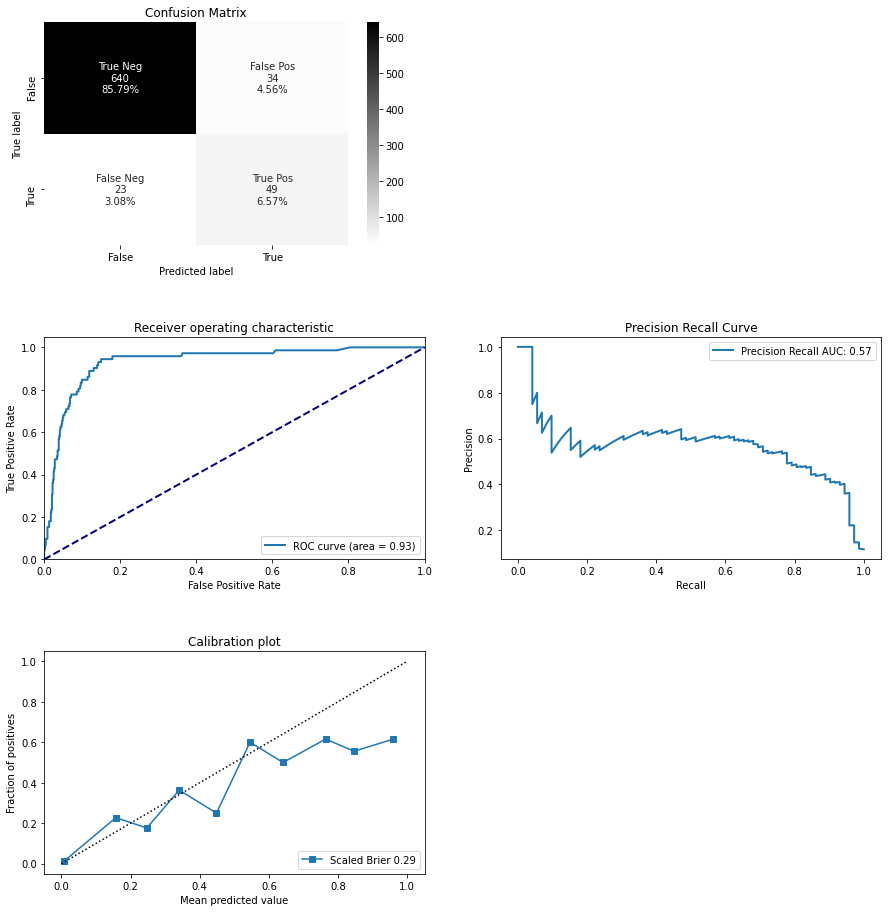

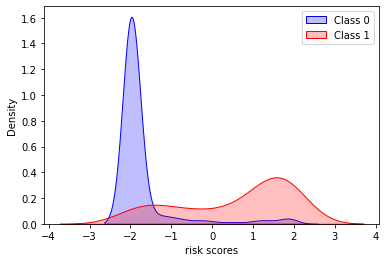

,,
,,
Ground Truth Prevalence,. . .,0.097
Test set Prevalence,. . .,0.111
True positive rate (recall),. . .,0.681
False positive rate,. . .,0.050
Positive predictive value (precision),. . .,0.590
True negative rate (specificity),. . .,0.950
False negative rate,. . .,0.319
Negative predictive value,. . .,0.965
Positive likelihood ratio (bigger is better),. . .,13.491


In [87]:
import MLFlow_Utils
binary_classification_metrics(y_test, preds["Label"], preds["Score"])

### Understand best algorithm features and results

In [89]:
# evaluate_model(xgbtuned)

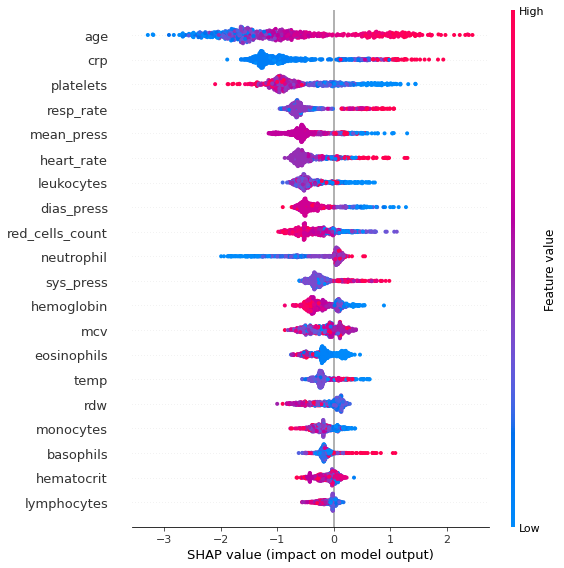

In [90]:
interpret_model(xgbtuned)

In [92]:
# plot_model(xgbtuned, plot='ktops')

In [100]:
# cattuned

### 2.3.1) Build a model with all data

In [93]:
final_model = finalize_model(xgbtuned)

In [94]:
str(final_model.__class__.__name__)

'XGBClassifier'

In [96]:
final_model_name = str(final_model.__class__.__name__) + '_same_region_plus_70pct_one_' \
                    + X_test_specific.region.iloc[0]  \
                    + '_' + X_test_specific.state.iloc[0]  \
                    + '_' + X_test_specific.city_hospital.iloc[0]
# final_model_name

In [97]:
save_model(final_model, final_model_name ,verbose=True)

Transformation Pipeline and Model Succesfully Saved


# Use the saved model to predict on specific hospital

In [98]:
import pickle
import joblib

#Carrego o modelo unico
# print('loaded: ' + final_model_name)
all_except_one_model_pkl = final_model_name + ".pkl"
prep_pipe_all_except_one, all_except_one_model = joblib.load(all_except_one_model_pkl)

In [99]:
all_except_one_model.__class__.__name__

'XGBClassifier'

In [101]:
# x_test_specific_name

In [102]:
#Carrego o X_test do modelo único
X_test_single = pd.read_csv(x_test_specific_name, delimiter=";",index_col=0)
X_test_single.shape

(533, 25)

In [103]:
X_test_single.columns

Index(['city_hospital', 'age', 'male', 'heart_rate', 'resp_rate', 'sys_press',
       'dias_press', 'mean_press', 'temp', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'basophils', 'eosinophils', 'monocytes',
       'crp', 'region', 'state'],
      dtype='object')

In [104]:
#Carrego o Y_test do modelo único
y_test_single = pd.read_csv(y_test_specific_name, delimiter=";",index_col=0)
y_test_single = y_test_single["death"]
y_test_single.shape

(533,)

In [106]:
pd.set_option('display.max_columns', None)
# X_test_single.head()

In [107]:
X_test_single["class"] = y_test_single

In [108]:
X_test_single.columns

Index(['city_hospital', 'age', 'male', 'heart_rate', 'resp_rate', 'sys_press',
       'dias_press', 'mean_press', 'temp', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'basophils', 'eosinophils', 'monocytes',
       'crp', 'region', 'state', 'class'],
      dtype='object')

In [109]:
X_test_single = X_test_single.drop(['city_hospital'],axis=1)
X_test_single = X_test_single.drop(['region'],axis=1)
X_test_single = X_test_single.drop(['state'],axis=1)

In [110]:
X_test_single_transformed = prep_pipe_all_except_one.fit_transform(X_test_single)
X_test_single_transformed.head()

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
age,Numeric
male,Categorical
heart_rate,Categorical
resp_rate,Numeric
sys_press,Categorical
dias_press,Categorical
mean_press,Categorical
temp,Categorical
hemoglobin,Numeric
platelets,Numeric


,class,age,hemoglobin,platelets,hematocrit,red_cells_count,hcm,rdw,mcv,leukocytes,neutrophil,lymphocytes,basophils,eosinophils,monocytes,male_1.0
5959,1,0.459,1.258,0.451,1.251,0.874,0.711,-0.198,0.694,0.179,1.432,0.480,-0.093,-0.255,0.016,1.000
6979,0,0.266,0.581,1.359,0.763,1.481,-1.547,0.253,-1.355,-0.124,-0.003,0.571,5.643,1.448,-0.914,1.000
7146,0,0.072,0.064,-1.482,0.018,0.115,-0.477,0.366,-0.648,0.105,-1.533,-1.216,-0.689,-0.351,-1.191,0.000
6938,1,1.296,0.621,-0.133,0.574,0.377,0.354,-0.198,0.228,-0.093,0.359,0.021,-0.018,-0.255,0.486,0.000
6514,0,-1.281,1.855,1.193,1.724,1.730,0.394,-0.930,0.072,-0.118,0.219,0.461,-0.018,-0.255,0.009,1.000


In [111]:
X_test_single_transformed = X_test_single_transformed.drop(['class'],axis=1)

In [112]:
X_test_single_transformed.shape

(533, 15)

In [113]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0', 'male_nan'],
      dtype='object')

In [114]:
X_test_single_transformed.columns

Index(['age', 'hemoglobin', 'platelets', 'hematocrit', 'red_cells_count',
       'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil', 'lymphocytes',
       'basophils', 'eosinophils', 'monocytes', 'male_1.0'],
      dtype='object')

In [115]:
#Show distinct columns
distinct_columns = X_test[X_test.columns.difference(X_test_single.columns)].columns.tolist()
distinct_columns

['male_1.0', 'male_nan']

In [116]:
#Show distinct columns
distinct_columns = X_test[X_test.columns.difference(X_test_single_transformed.columns)].columns.tolist()
distinct_columns

['crp',
 'dias_press',
 'heart_rate',
 'male_nan',
 'mean_press',
 'resp_rate',
 'sys_press',
 'temp']

### Add missing columns to some hospitals that didn't collect all columns

In [117]:
for column in distinct_columns:
    if(column=='male_0.0'):
        X_test_single_transformed['male_0.0'] = X_test_single_transformed['male_1.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)
        X_test_single_transformed = X_test_single_transformed.drop('male_1.0', axis=1)
    elif(column=='male_1.0'):
        X_test_single_transformed['male_1.0'] = X_test_single_transformed['male_0.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)
        X_test_single_transformed = X_test_single_transformed.drop('male_0.0', axis=1)
    else:
        X_test_single_transformed[column]=np.NaN

In [118]:
# X_test_single_transformed['male_1.0'] = X_test_single_transformed['male_0.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)

In [119]:
X_test_single_transformed.columns

Index(['age', 'hemoglobin', 'platelets', 'hematocrit', 'red_cells_count',
       'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil', 'lymphocytes',
       'basophils', 'eosinophils', 'monocytes', 'male_1.0', 'crp',
       'dias_press', 'heart_rate', 'male_nan', 'mean_press', 'resp_rate',
       'sys_press', 'temp'],
      dtype='object')

In [120]:
X_test_single_transformed.shape

(533, 23)

In [121]:
X_test_single_transformed.shape

(533, 23)

In [122]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0', 'male_nan'],
      dtype='object')

In [123]:
X_test_single_transformed.columns

Index(['age', 'hemoglobin', 'platelets', 'hematocrit', 'red_cells_count',
       'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil', 'lymphocytes',
       'basophils', 'eosinophils', 'monocytes', 'male_1.0', 'crp',
       'dias_press', 'heart_rate', 'male_nan', 'mean_press', 'resp_rate',
       'sys_press', 'temp'],
      dtype='object')

**Reorder columns**

In [124]:
# X_test_single_transformed['male_1.0'] = X_test_single_transformed['male_0.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)

In [125]:
# Reorder columns
X_test_single_transformed = X_test_single_transformed[X_test.columns]
X_test_single_transformed.shape

(533, 23)

0.6573703445875392


[<matplotlib.lines.Line2D at 0x1845cdee788>]

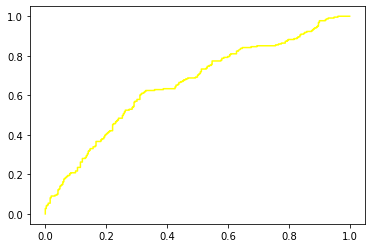

In [126]:
#Vejo a curva ROC do modelo INDIVIDUAL e confirmo o valor da AUC
from sklearn.metrics import (roc_curve,auc)

y_pred_prob1 = all_except_one_model.predict_proba(X_test_single_transformed)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test_single, y_pred_prob1)

auc_ind = auc(fpr1, tpr1)
print(auc_ind)
plt.plot(fpr1, tpr1, label= "Single Model - XGBoost - AUC " +  str(auc_ind), color="yellow")

In [127]:
y_pred_prob1.shape

(533,)

In [128]:
y_pred = all_except_one_model.predict(X_test_single_transformed)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

,,
,,
Ground Truth Prevalence,. . .,0.415
Test set Prevalence,. . .,0.021
True positive rate (recall),. . .,0.041
False positive rate,. . .,0.006
Positive predictive value (precision),. . .,0.818
True negative rate (specificity),. . .,0.994
False negative rate,. . .,0.959
Negative predictive value,. . .,0.594
Positive likelihood ratio (bigger is better),. . .,6.353


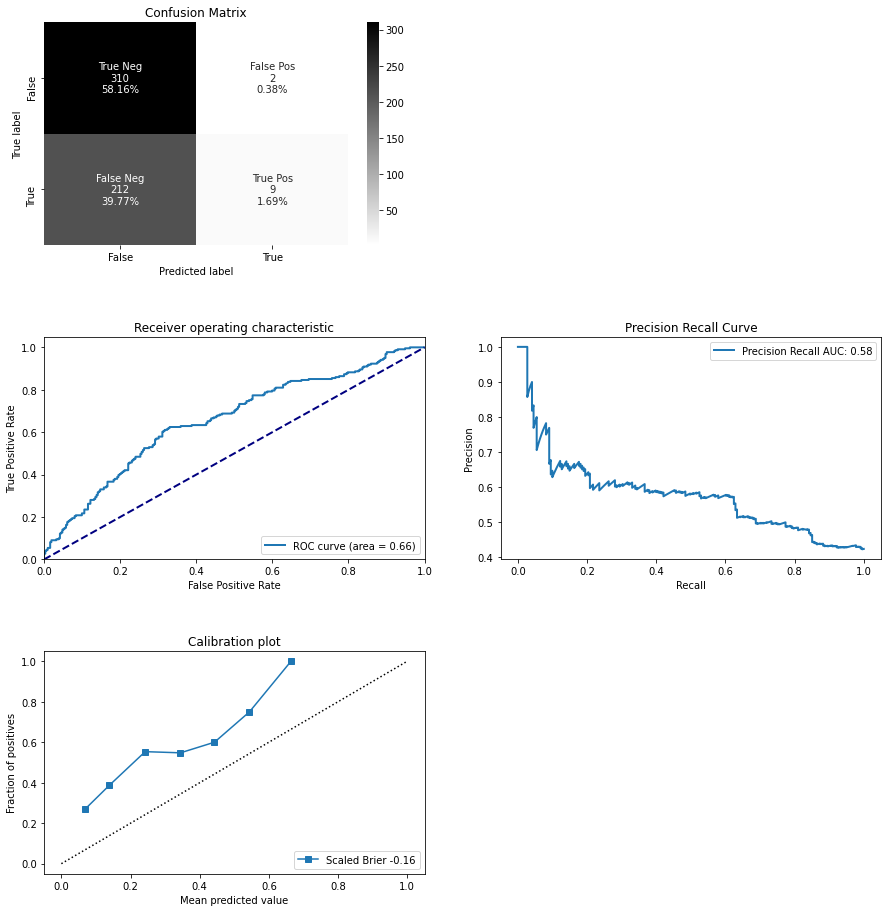

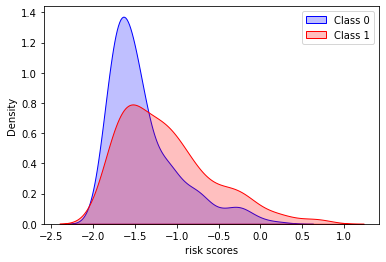

,,
,,
Ground Truth Prevalence,. . .,0.415
Test set Prevalence,. . .,0.021
True positive rate (recall),. . .,0.041
False positive rate,. . .,0.006
Positive predictive value (precision),. . .,0.818
True negative rate (specificity),. . .,0.994
False negative rate,. . .,0.959
Negative predictive value,. . .,0.594
Positive likelihood ratio (bigger is better),. . .,6.353


In [129]:
import MLFlow_Utils
binary_classification_metrics(y_test_single, y_pred, y_pred_prob1)

In [130]:
fprate, tprate, thresholds = roc_curve(y_test_single, y_pred_prob1, pos_label=1)
auc(fprate, tprate)

0.6573703445875392

In [131]:
#ROC_AUC
["{0:0.2f}".format(i) for i in AUC_CI(y_test_single, y_pred_prob1)]

['0.61', '0.70']

In [132]:
#recall
tpr(y_test_single, y_pred)

0.04072398190045249

In [133]:
#specificity
tnr(y_test_single, pd.Series(y_pred))

0.9935897435897436

In [134]:
#accuracy
accuracy(y_test_single, y_pred)

0.5984990619136961

In [135]:
ppv(y_test_single, y_pred)

0.8181818181818182

In [136]:
npv(y_test_single, y_pred)

0.5938697318007663

# Ending Predicting part